# Order Delivery Time Prediction - Chinmay H R

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [53]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  seaborn as sns


## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [54]:
# Importing the file porter_data_1.csv
df = pd.read_csv('/content/porter_data_1.csv')

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [55]:
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [56]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
df['created_at']  =  pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [57]:
df.dtypes

market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category               int64
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
dtype: object

In [58]:
# Convert categorical features to category type
df['market_id'] = df['market_id'].astype('category')
df['store_primary_category'] = df['store_primary_category'].astype('category')
df['order_protocol'] = df['order_protocol'].astype('category')

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [59]:
# Calculate time taken in minutes
df['time_taken'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

In [60]:
df.head()

market_id          created_at actual_delivery_time store_primary_category  \
0       1.0 2015-02-06 22:24:17  2015-02-06 23:11:17                      4   
1       2.0 2015-02-10 21:49:25  2015-02-10 22:33:25                     46   
2       2.0 2015-02-16 00:11:35  2015-02-16 01:06:35                     36   
3       1.0 2015-02-12 03:36:46  2015-02-12 04:35:46                     38   
4       1.0 2015-01-27 02:12:36  2015-01-27 02:58:36                     38   

  order_protocol  total_items  subtotal  num_distinct_items  min_item_price  \
0            1.0            4      3441                   4             557   
1            2.0            1      1900                   1            1400   
2            3.0            4      4771                   3             820   
3            1.0            1      1525                   1            1525   
4            1.0            2      3620                   2            1425   

   max_item_price  total_onshift_dashers  total_busy_dashers  \
0            1239                   33.0                14.0   
1            1400                    1.0                 2.0   
2            1604                    8.0                 6.0   
3            1525                    5.0                 6.0   
4            2195                    5.0                 5.0   

   total_outstanding_orders  distance  time_taken  
0                      21.0     34.44        47.0  
1                       2.0     27.60        44.0  
2                      18.0     11.56        55.0  
3                       8.0     31.80        59.0  
4                       7.0      8.20        46.0

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [61]:
# Extract the hour and day of week from the 'created_at' timestamp
df['hour'] = df['created_at'].dt.hour
df['day_of_week'] = df['created_at'].dt.dayofweek # Monday=0, Sunday=6

df['isWeekend'] = (df['day_of_week'] >= 5).astype(int) # 1 =weekend, 0= weekday

In [62]:
# Drop unnecessary columns
df = df.drop(['created_at', 'actual_delivery_time'], axis=1)

In [63]:
df.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  time_taken  hour  \
0                14.0                      21.0     34.44        47.0    22   
1                 2.0                       2.0     27.60        44.0    21   
2                 6.0                      18.0     11.56        55.0     0   
3                 6.0                       8.0     31.80        59.0     3   
4                 5.0                       7.0      8.20        46.0     2   

   day_of_week  isWeekend  
0            4          0  
1            1          0  
2            0          0  
3            3          0  
4            1          0

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [64]:
# Define target variable (y) and features (X)
y = df['time_taken']
X = df.drop('time_taken', axis=1)

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [65]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [66]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(include='category').columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)

Numerical Columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour', 'day_of_week', 'isWeekend']
Categorical Columns: ['market_id', 'store_primary_category', 'order_protocol']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

In [67]:
df.head()

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   
2       2.0                     36            3.0            4      4771   
3       1.0                     38            1.0            1      1525   
4       1.0                     38            1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  time_taken  hour  \
0                14.0                      21.0     34.44        47.0    22   
1                 2.0                       2.0     27.60        44.0    21   
2                 6.0                      18.0     11.56        55.0     0   
3                 6.0                       8.0     31.80        59.0     3   
4                 5.0                       7.0      8.20        46.0     2   

   day_of_week  isWeekend  
0            4          0  
1            1          0  
2            0          0  
3            3          0  
4            1          0

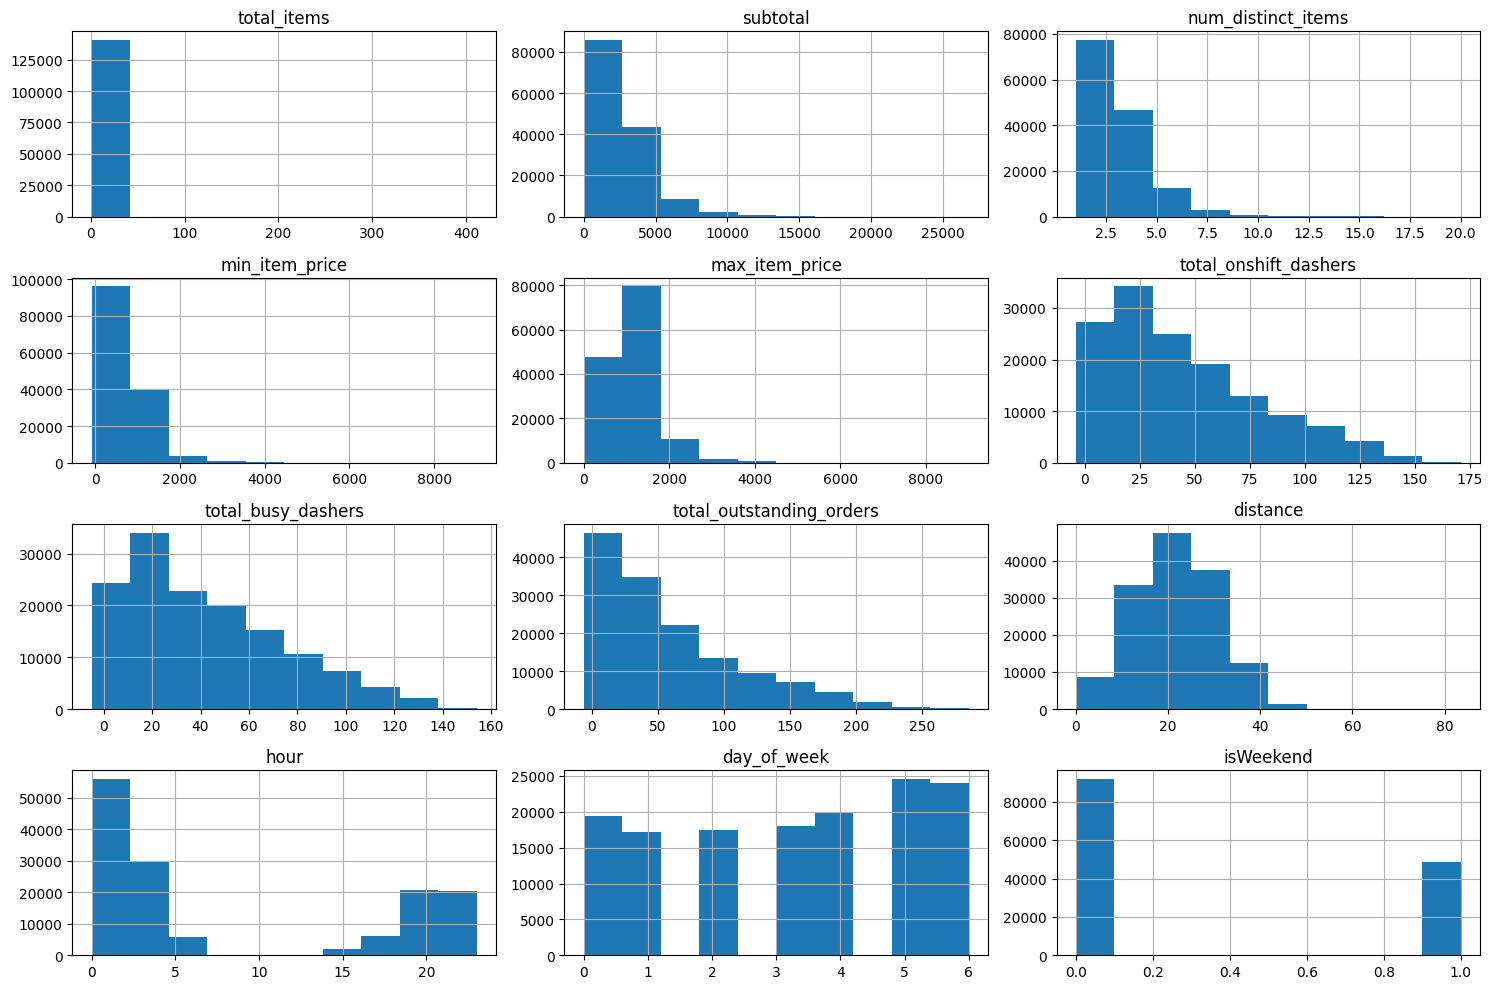

In [68]:
# Plot distributions for all numerical columns
X_train[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

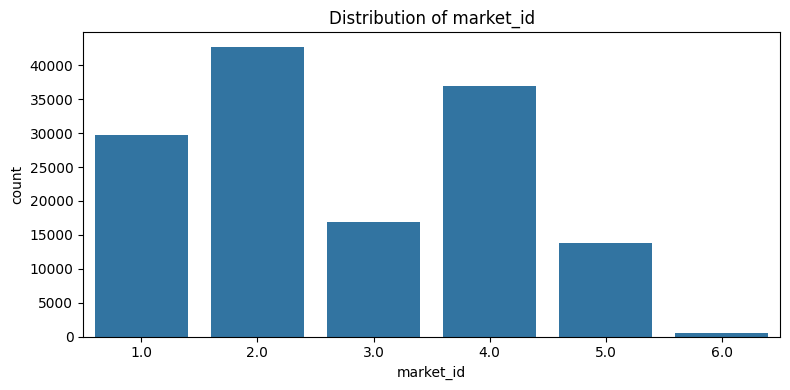

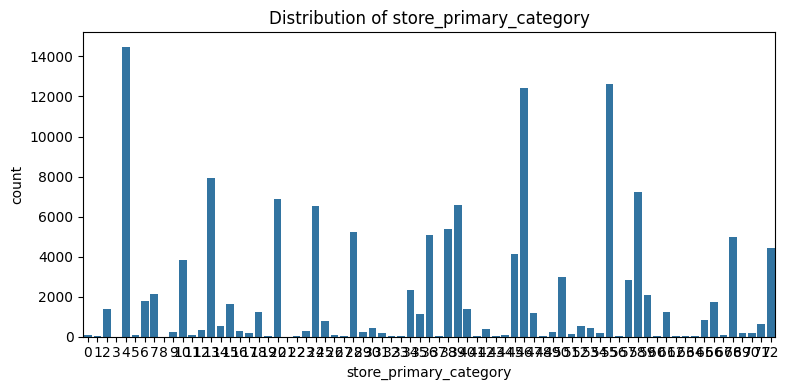

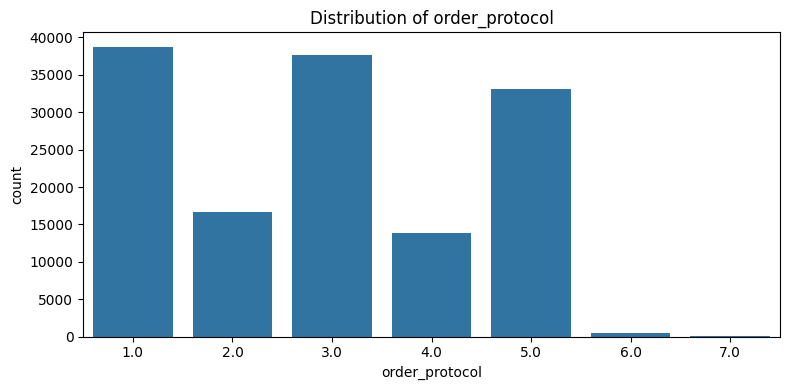

In [69]:
# Distribution of categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=X_train, x=col)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

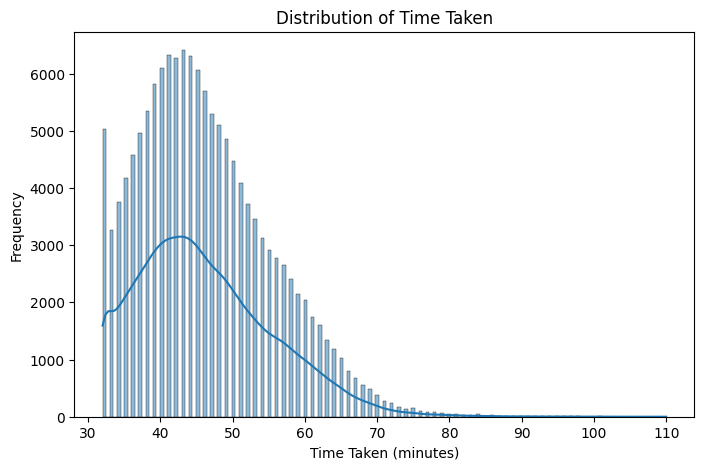

In [70]:
# Distribution of time_taken
plt.figure(figsize=(8, 5))
sns.histplot(y_train, kde=True)
plt.title('Distribution of Time Taken')
plt.xlabel('Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

In [71]:
df.head(2)

market_id store_primary_category order_protocol  total_items  subtotal  \
0       1.0                      4            1.0            4      3441   
1       2.0                     46            2.0            1      1900   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   

   total_busy_dashers  total_outstanding_orders  distance  time_taken  hour  \
0                14.0                      21.0     34.44        47.0    22   
1                 2.0                       2.0     27.60        44.0    21   

   day_of_week  isWeekend  
0            4          0  
1            1          0

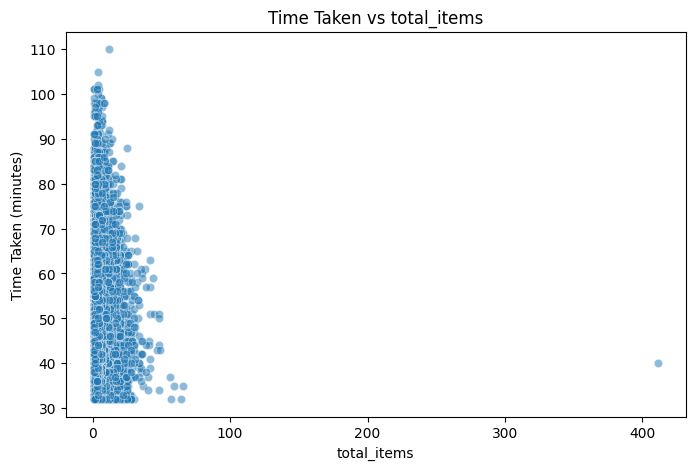

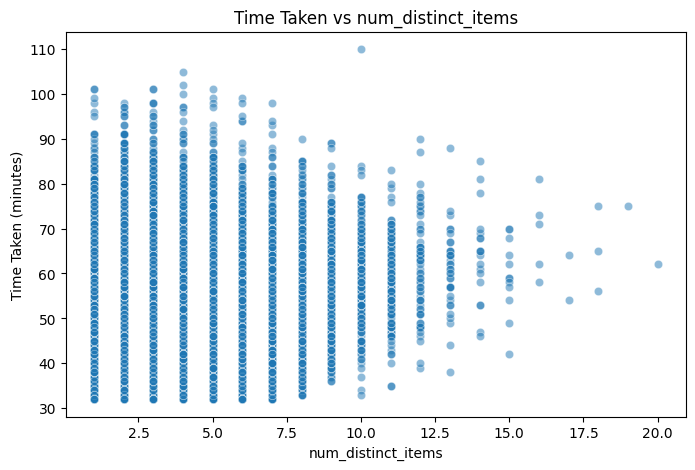

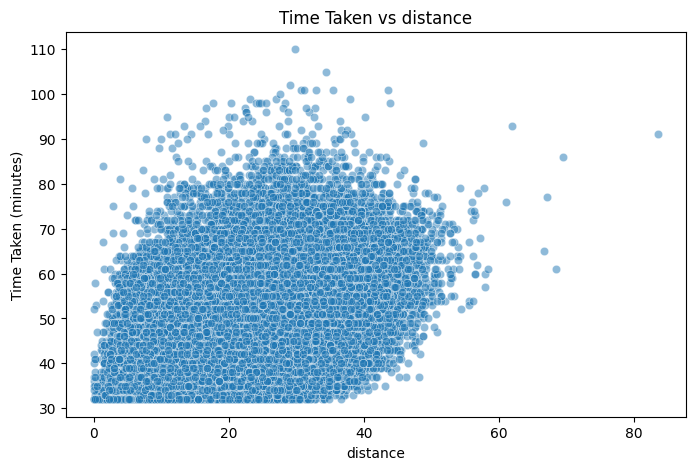

In [72]:
# Scatter plot to visualise the relationship between time_taken and other features
 important_numerical_features = ['total_items', 'subtotal', 'num_distinct_items', 'distance']

for col in important_numerical_features:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=X_train.join(y_train), x=col, y='time_taken', alpha=.5)
    plt.title(f'Time Taken vs {col}')
    plt.xlabel(col)
    plt.ylabel('Time Taken (minutes)')
    plt.show()

In [73]:
# Show the distribution of time_taken for different hours
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train.join(y_train), x='hour', y='time_taken')
plt.title('Time Taken vs Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Time Taken (minutes)')
plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

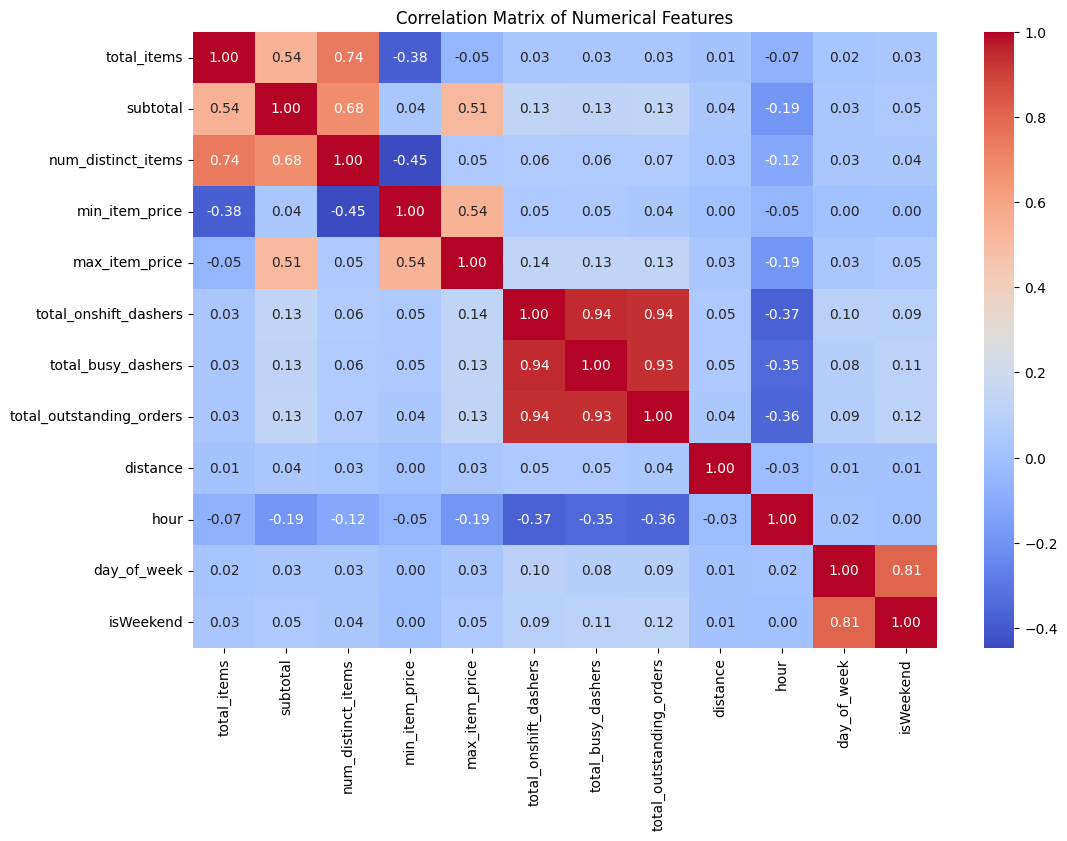

In [74]:
# Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = X_train[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [75]:
# Drop 3-5 weakly correlated columns from training dataset
weakly_correlated_cols = ['min_item_price', 'max_item_price', 'day_of_week', 'isWeekend']
X_train = X_train.drop(columns=weakly_correlated_cols)
X_test = X_test.drop(columns=weakly_correlated_cols)

# Update numerical_cols and categorical_cols after dropping columns
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes(include='category').columns.tolist()

print("Updated Numerical Columns:", numerical_cols)
print("Updated Categorical Columns:", categorical_cols)

Updated Numerical Columns: ['total_items', 'subtotal', 'num_distinct_items', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'hour']
Updated Categorical Columns: ['market_id', 'store_primary_category', 'order_protocol']


#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

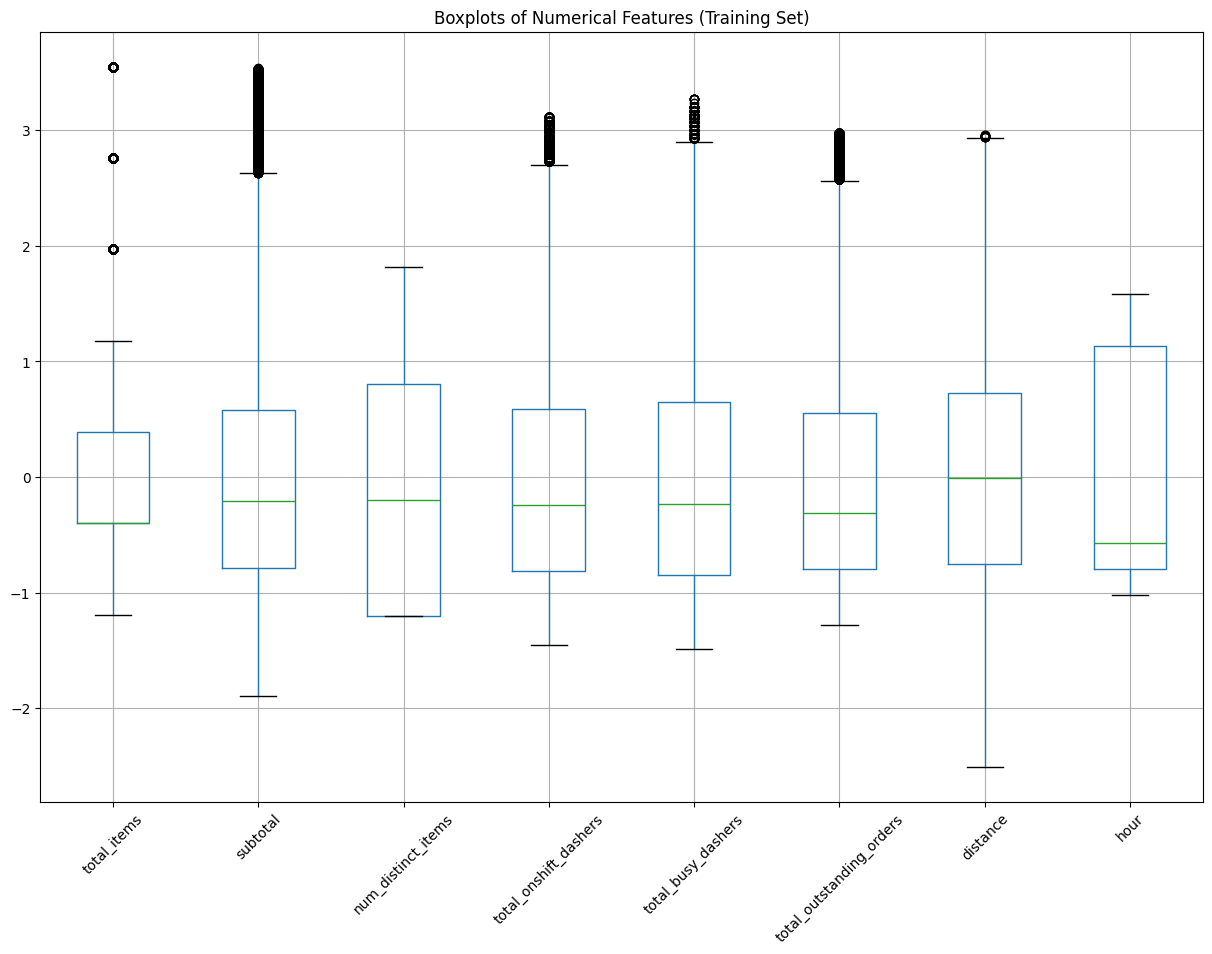

In [104]:
# Boxplot for numerical features and time_taken
plt.figure(figsize=(15, 10))
X_train[numerical_cols].boxplot()
plt.title('Boxplots of Numerical Features (Training Set)')
plt.xticks(rotation=45)
plt.show()



In [102]:
# Boxplot of Time Taken
plt.figure(figsize=(8, 5))
sns.boxplot(y=y_train)
plt.title('Boxplot of Time Taken (Training Set)')
plt.ylabel('Time Taken (min)')
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [77]:
df.describe()

total_items       subtotal  num_distinct_items  min_item_price  \
count  175777.000000  175777.000000       175777.000000   175777.000000   
mean        3.204976    2697.111147            2.675060      684.965433   
std         2.674055    1828.554893            1.625681      519.882924   
min         1.000000       0.000000            1.000000      -86.000000   
25%         2.000000    1412.000000            1.000000      299.000000   
50%         3.000000    2224.000000            2.000000      595.000000   
75%         4.000000    3410.000000            3.000000      942.000000   
max       411.000000   26800.000000           20.000000    14700.000000   

       max_item_price  total_onshift_dashers  total_busy_dashers  \
count   175777.000000          175777.000000       175777.000000   
mean      1160.158616              44.918664           41.861381   
std        560.828571              34.544724           32.168505   
min          0.000000              -4.000000           -5.000000   
25%        799.000000              17.000000           15.000000   
50%       1095.000000              37.000000           35.000000   
75%       1395.000000              66.000000           63.000000   
max      14700.000000             171.000000          154.000000   

       total_outstanding_orders       distance     time_taken           hour  \
count             175777.000000  175777.000000  175777.000000  175777.000000   
mean                  58.230115      21.843090      46.203013       8.473441   
std                   52.731043       8.748712       9.327424       8.676809   
min                   -6.000000       0.000000      32.000000       0.000000   
25%                   17.000000      15.360000      39.000000       2.000000   
50%                   41.000000      21.760000      45.000000       3.000000   
75%                   85.000000      28.120000      52.000000      19.000000   
max                  285.000000      83.520000     110.000000      23.000000   

         day_of_week      isWeekend  
count  175777.000000  175777.000000  
mean        3.222293       0.345614  
std         2.043874       0.475569  
min         0.000000       0.000000  
25%         1.000000       0.000000  
50%         3.000000       0.000000  
75%         5.000000       1.000000  
max         6.000000       1.000000

In [78]:
# Handle outliers using IQR for numerical columns and time_taken
Q1 = X_train[numerical_cols].quantile(0.25)
Q3 = X_train[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Create a mask for outliers in numerical columns of X_train
numerical_outlier_mask = ((X_train[numerical_cols] < (Q1 - 1.5 * IQR)) | (X_train[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)


In [79]:
# Handle outliers for time_taken
Q1_time = y_train.quantile(0.25)
Q3_time = y_train.quantile(0.75)
IQR_time = Q3_time - Q1_time

# Create a mask for outliers in y_train
time_taken_outlier_mask = ((y_train < (Q1_time - 1.5 * IQR_time)) | (y_train > (Q3_time + 1.5 * IQR_time)))


In [80]:
# Combine the masks and filter both X_train and y_train
combined_mask = numerical_outlier_mask | time_taken_outlier_mask

X_train = X_train[~combined_mask]
y_train = y_train[~combined_mask]

X_train.shape
y_train.shape

(116095,)

## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [81]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [82]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [83]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [84]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [85]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [86]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [87]:
# Import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [88]:
# Apply scaling to the numerical columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

/tmp/ipython-input-88-1467882732.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [89]:
# Create/Initialise the model
X_train_sm = sm.add_constant(X_train[numerical_cols])

# Create and fit the OLS model
lr_model = sm.OLS(y_train, X_train_sm).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:             time_taken   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 7.511e+04
Date:                Sun, 27 Jul 2025   Prob (F-statistic):               0.00
Time:                        10:47:48   Log-Likelihood:            -3.0276e+05
No. Observations:              116095   AIC:                         6.055e+05
Df Residuals:                  116086   BIC:                         6.056e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [90]:
# Train the model using the training data
lr = LinearRegression()
lr.fit(X_train[numerical_cols], y_train)
print("Coefficients:", lr.coef_)
print("Intercept:", lr.intercept_)


Coefficients: [ -0.36433881   1.95823409   0.55633388 -11.92192745  -3.98662794
  16.12730401   4.07089038  -2.12403474]
Intercept: 44.58840604677204


In [91]:
# Make predictions
y_pred = lr.predict(X_test[numerical_cols])

In [92]:
# Find results for evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 12.643287604013905
R-squared: 0.8555503265365612


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

In [93]:
# Loop through the number of features and test the model
nof_list = np.arange(1, len(numerical_cols) + 1)
high_score = 0
nof = 0
score_list = []

for n in nof_list:
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=n)

    X_train_rfe = rfe.fit_transform(X_train[numerical_cols], y_train)
    X_test_rfe = rfe.transform(X_test[numerical_cols])

    model.fit(X_train_rfe, y_train)
    score = model.score(X_test_rfe, y_test)
    score_list.append(score)

    if score > high_score:
        high_score = score
        nof = n

print(f"Best R² Score with {nof} features: {high_score:.4f}")


Best R² Score with 7 features: 0.8557


In [94]:
# Select features having VIF < 0.5
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                     feature        VIF
0                  market_id   4.746774
1     store_primary_category   3.797858
2             order_protocol   4.444776
3                total_items   6.134240
4                   subtotal  10.633495
5         num_distinct_items  13.430459
6             min_item_price   5.456569
7             max_item_price  11.324561
8      total_onshift_dashers  33.381554
9         total_busy_dashers  30.352949
10  total_outstanding_orders  22.275127
11                  distance   6.090179
12                      hour   2.163827
13               day_of_week   9.659317
14                 isWeekend   4.458973


In [95]:
# Build the final model with selected number of features
model = LinearRegression()
rfe = RFE(model, n_features_to_select=nof) # Use the optimal number of features found earlier
X_train_rfe = rfe.fit_transform(X_train[numerical_cols], y_train)
X_test_rfe = rfe.transform(X_test[numerical_cols])

# Train the model on the RFE selected features
final_lr_model = LinearRegression()
final_lr_model.fit(X_train_rfe, y_train)

# Make predictions on the test set using the final model
y_pred_final = final_lr_model.predict(X_test_rfe)


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [96]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram
residuals = y_test - y_pred_final

# Residuals vs Predicted values plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_final, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Time Taken')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


In [97]:
# Q-Q plot of residuals

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


In [105]:
# Histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [98]:
# Compare the scaled vs unscaled features used in the final model
selected_features_mask = rfe.support_
selected_feature_names = X_train[numerical_cols].columns[selected_features_mask]

X_train_unscaled_selected = X_train.drop(columns='const', errors='ignore')[selected_feature_names]
X_test_unscaled_selected = X_test.drop(columns='const', errors='ignore')[selected_feature_names]

unscaled_lr_model = LinearRegression()
unscaled_lr_model.fit(X_train_unscaled_selected, y_train)

LinearRegression()

In [99]:
# Display scaled coefficients (from the final_lr_model trained on scaled data)
print("Scaled Coefficients:")
for feature, coef in zip(selected_feature_names, final_lr_model.coef_):
    print(f"{feature}: {coef:.4f}")

print("\nUnscaled Coefficients:")
for feature, coef in zip(selected_feature_names, unscaled_lr_model.coef_):
    print(f"{feature}: {coef:.4f}")

print(f"\nScaled Model Intercept: {final_lr_model.intercept_:.4f}")
print(f"Unscaled Model Intercept: {unscaled_lr_model.intercept_:.4f}")

Scaled Coefficients:
subtotal: 1.9073
num_distinct_items: 0.2764
total_onshift_dashers: -11.9217
total_busy_dashers: -3.9847
total_outstanding_orders: 16.1306
distance: 4.0720
hour: -2.1322

Unscaled Coefficients:
subtotal: 1.9073
num_distinct_items: 0.2764
total_onshift_dashers: -11.9217
total_busy_dashers: -3.9847
total_outstanding_orders: 16.1306
distance: 4.0720
hour: -2.1322

Scaled Model Intercept: 44.5884
Unscaled Model Intercept: 44.5884


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [100]:
# Analyze the effect of a unit change in a feature, say 'total_items'
if 'total_items' in selected_feature_names:
    total_items_coef_unscaled = unscaled_lr_model.coef_[selected_feature_names.get_loc('total_items')]

    print(f"The unscaled coefficient for 'total_items' is: {total_items_coef_unscaled:.4f}")
else:
    print("'total_items' was not selected in the final model.")


'total_items' was not selected in the final model.


Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
> Yes there are Categorical variables.  categorical variables influence is indirectly captured to some extent by other features in the model



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
>It refers that 20% of the data will be using as the training data and the rest 80% will be using as the teting data to train the ML model



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Number of distinct items has the highest correlation with target variable



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>IQR method was used to detect the outliers. However those were removed, applying the range by using loop



---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
>1.Total outstanding order
2.Total onshift dashers
3.Distance



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Linear Regression is a supervised learning algorithm used for predicting a continuous dependent variable based on one or more independent variables. It assumes a linear relationship between the variables.




---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>
*  Simple Linear Regression involves one independent variable and one dependent variable
*  Multiple Linear Regression involves two or more independent variables to predict a single dependent variable.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
>
The cost function in linear regression measures how well the model’s predictions match the actual data. The most common cost function is Mean Squared Error (MSE):



---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.



**Answer:**

>Overfitting occurs when a model learns too much from the training data, including noise. It performs well on training data but poorly on unseen data.

Underfitting occurs when a model is too simple and fails to capture the underlying trend in the data. It performs poorly on both training and test data.



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residuals are the differences between actual and predicted values. A residual plot helps by

Checking Linearity: If residuals are randomly scattered around 0, the linearity assumption holds.

Identifying Heteroscedasticity: A pattern  indicates unequal variance.

Detecting Outliers: Large residuals may indicate outliers or influential data points.

Assessing Independence: Patterns in residuals suggest correlation